# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Rafki Haykhal Alif  
**NIM:** 122140035

**Link Repository:** https://github.com/RafkiHaykhalAlif/Hands-on_Mulmed

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

A. Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.

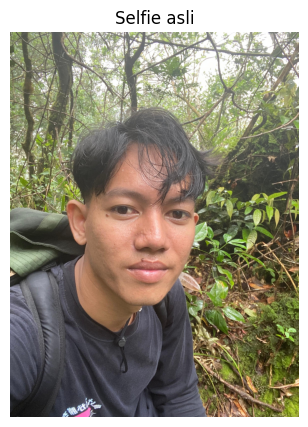

In [53]:
import cv2
import matplotlib.pyplot as plt

# Path gambar selfie
img_path = 'assets_ws4/foto_selfie.jpeg'

# Baca gambar dengan OpenCV
img_bgr = cv2.imread(img_path)

# Konversi ke RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Selfie asli')
plt.show()


B. Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.

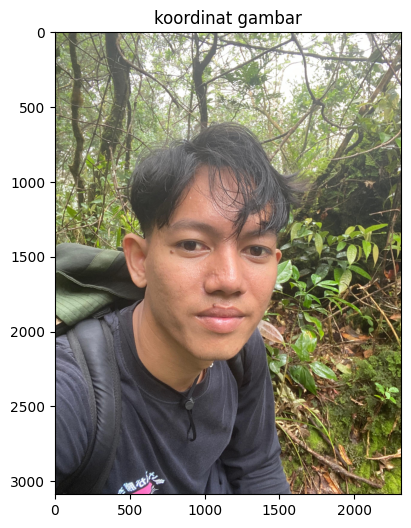

In [54]:
# Pembantu penentuan titik koordinat
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("koordinat gambar")
plt.axis('on')
plt.show()


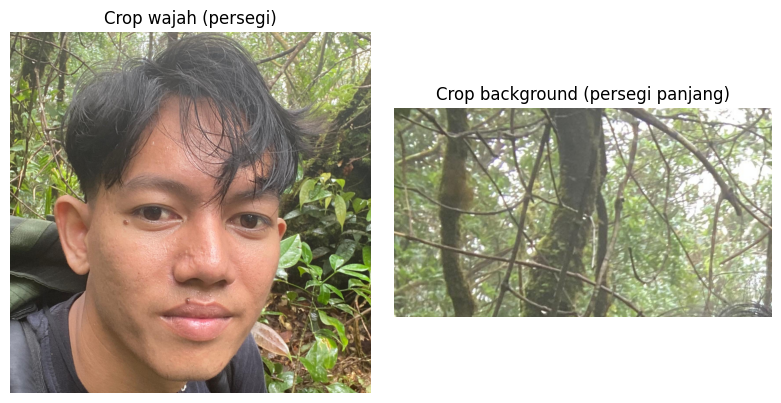

True

In [55]:
# Format: x, y, width, height

# Crop kotak persegi pada area wajah
x_face, y_face, w_face, h_face = 250, 600, 1650, 1650
face_crop = img_rgb[y_face:y_face + h_face, x_face:x_face + w_face]

# Crop persegi panjang pada area latar belakang
x_bg, y_bg, w_bg, h_bg = 0, 250, 900, 500
bg_crop = img_rgb[y_bg:y_bg + h_bg, x_bg:x_bg + w_bg]

# Tampilkan hasil crop
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(face_crop)
ax[0].set_title('Crop wajah (persegi)')
ax[0].axis('off')

ax[1].imshow(bg_crop)
ax[1].set_title('Crop background (persegi panjang)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil crop
cv2.imwrite('results_ws4/soal1_face_crop.png', cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
cv2.imwrite('results_ws4/soal1_bg_crop.png', cv2.cvtColor(bg_crop, cv2.COLOR_RGB2BGR))



C. Resize hasil crop menjadi **920×920 piksel**.

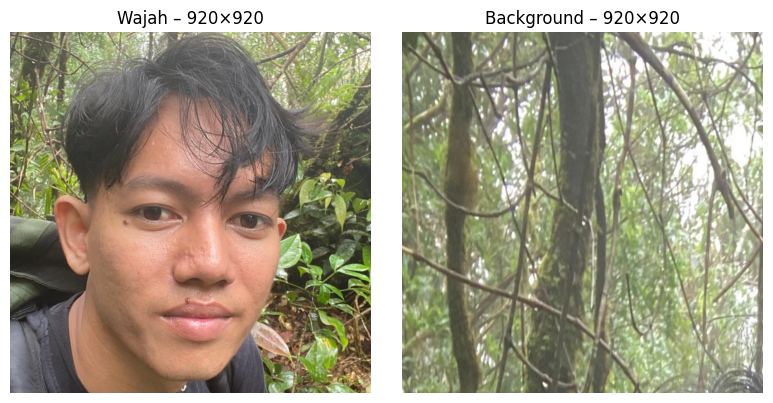

True

In [56]:
import cv2
import matplotlib.pyplot as plt

# Ukuran resize (width, height)
target_size = (920, 920)

# Resize wajah
face_resized = cv2.resize(face_crop, target_size, interpolation=cv2.INTER_AREA)

# Resize background
bg_resized   = cv2.resize(bg_crop,   target_size, interpolation=cv2.INTER_AREA)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(face_resized)
ax[0].set_title('Wajah – 920×920')
ax[0].axis('off')

ax[1].imshow(bg_resized)
ax[1].set_title('Background – 920×920')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil resize
cv2.imwrite('results_ws4/soal1_face_resized_920.png', cv2.cvtColor(face_resized, cv2.COLOR_RGB2BGR))
cv2.imwrite('results_ws4/soal1_bg_resized_920.png', cv2.cvtColor(bg_resized, cv2.COLOR_RGB2BGR))



D. Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.

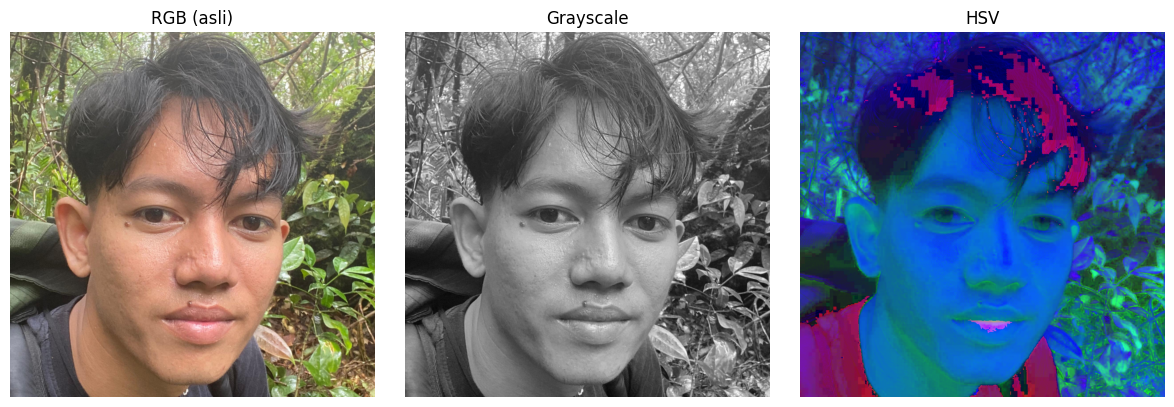

True

In [57]:
# Konversi wajah ke grayscale
face_gray = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)

# Konversi wajah ke HSV
face_hsv = cv2.cvtColor(face_resized, cv2.COLOR_RGB2HSV)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(face_resized)
ax[0].set_title('RGB (asli)')
ax[0].axis('off')

ax[1].imshow(face_gray, cmap='gray')
ax[1].set_title('Grayscale')
ax[1].axis('off')

ax[2].imshow(face_hsv)
ax[2].set_title('HSV')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil grayscale
cv2.imwrite('results_ws4/soal1_face_gray.png', face_gray)

# Simpan hasil HSV
cv2.imwrite('results_ws4/soal1_face_hsv.png', face_hsv)



E. Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.


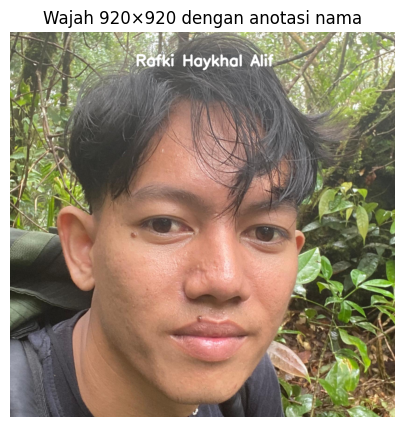

True

In [58]:
# Teks nama di atas wajah
annotated_face = face_resized.copy()

nama = "Rafki Haykhal Alif"

# Posisi teks
text_position = (300, 80)

annotated_bgr = cv2.cvtColor(annotated_face, cv2.COLOR_RGB2BGR)

cv2.putText(
    annotated_bgr,
    nama,
    text_position,
    cv2.FONT_HERSHEY_SIMPLEX,
    1.2,              # ukuran font
    (255, 255, 255),  # warna putih
    3,                # ketebalan
    cv2.LINE_AA
)

annotated_face_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(annotated_face_rgb)
plt.title('Wajah 920×920 dengan anotasi nama')
plt.axis('off')
plt.show()

# Simpan hasil
cv2.imwrite('results_ws4/soal1_face_annotated.png', annotated_bgr)


F. Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


Efek crop pada gambar yaitu bertujuan untuk mengambil area pada suatu gambar berdasarkan dari titik koordinat yang ditentukan. pada proses ini saya menggunakan teori COCO yaitu dengan menentukan titik koordinak dari xface, yface, width, height. jika x terlalu besar maka crop terlalu ke kanan, jikan y terlalu besar makan crop terlalu kebawah, jika w terlalu kecil makan bagian kanan wajah akan hilang, dan jika h kecil makan bagian atas dan bawah wajah akan hilang.

Perubahan warna dari RGB, Grayscale, dan HSV bisa sangat terlihat yaitu pada citra RGB, warna tampak natural karena terdiri dari komponen merah, hijau, dan biru. Ketika dikonversi ke grayscale, informasi warna direduksi menjadi tingkat intensitas terang–gelap sehingga struktur bentuk dan kontras objek lebih mudah diamati. Sedangkan konversi ke HSV memisahkan hue (jenis warna), saturation (kekuatan warna), dan value (kecerahan).

### **Soal 2 — Manipulasi Channel Warna RGB**

A. Gunakan gambar hasil crop dari Soal 1.

B. Konversikan gambar ke ruang warna **RGB**.

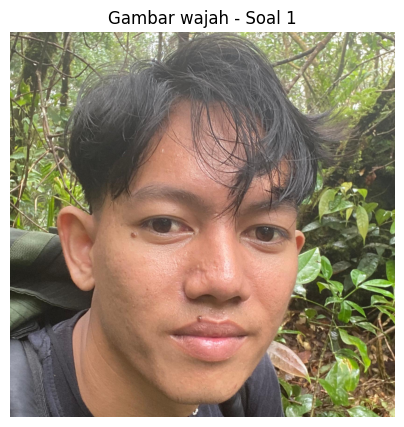

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan gambar wajah hasil crop dari soal 1
# Format gambar sudah RGB
face_rgb = face_crop.copy()

plt.figure(figsize=(5, 5))
plt.imshow(face_rgb)
plt.title('Gambar wajah - Soal 1')
plt.axis('off')
plt.show()


C. Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).

D. Teknik atau cara menaikkan/menurunkan intensitas dibebaskan, asalkan logis dan hasilnya terlihat.

E. Gabungkan kembali channel warna dan simpan gambar hasil modifikasi dalam format .png.

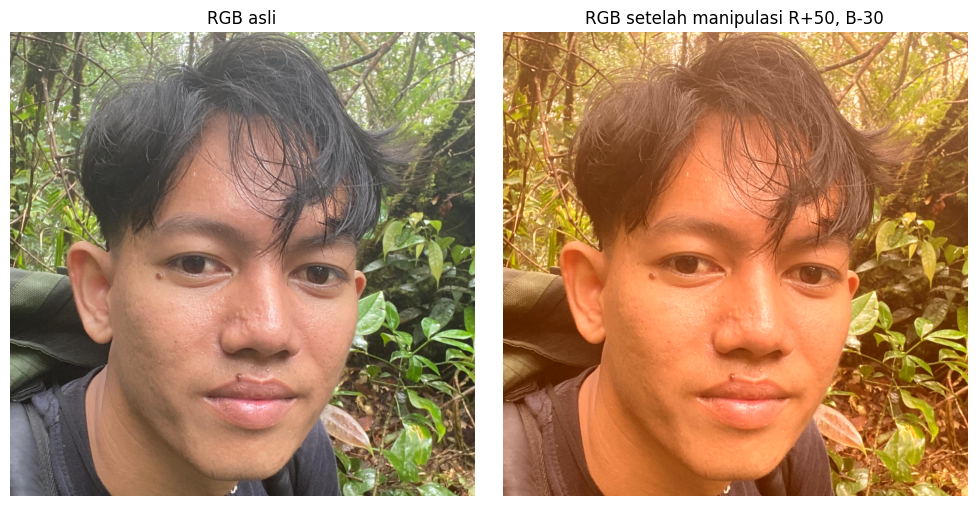

True

In [60]:
# Memisahkan channel R, G, B
R = face_rgb[:, :, 0].astype(np.int16)
G = face_rgb[:, :, 1].astype(np.int16)
B = face_rgb[:, :, 2].astype(np.int16)

# Menaikkan intensitas channel merah sebanyak 50 poin
R_mod = np.clip(R + 50, 0, 255).astype(np.uint8)

# Menurunkan intensitas channel biru sebanyak 30 poin
B_mod = np.clip(B - 30, 0, 255).astype(np.uint8)

# Channel hijau tidak diubah
G_mod = G.astype(np.uint8)

# Mengabungkan kembali menjadi citra RGB yang sudah dimodifikasi
face_rgb_mod = np.dstack((R_mod, G_mod, B_mod))

# Tampilkan perbandingan
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(face_rgb)
ax[0].set_title('RGB asli')
ax[0].axis('off')

ax[1].imshow(face_rgb_mod)
ax[1].set_title('RGB setelah manipulasi R+50, B-30')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Simpan gambar hasil modifikasi
face_rgb_mod_bgr = cv2.cvtColor(face_rgb_mod, cv2.COLOR_RGB2BGR)
cv2.imwrite('results_ws4/soal2_face_rgb_modified.png', face_rgb_mod_bgr)


F. Tampilkan histogram per channel (R, G, B) untuk gambar asli dan hasil modifikasi menggunakan matplotlib.pyplot.hist.

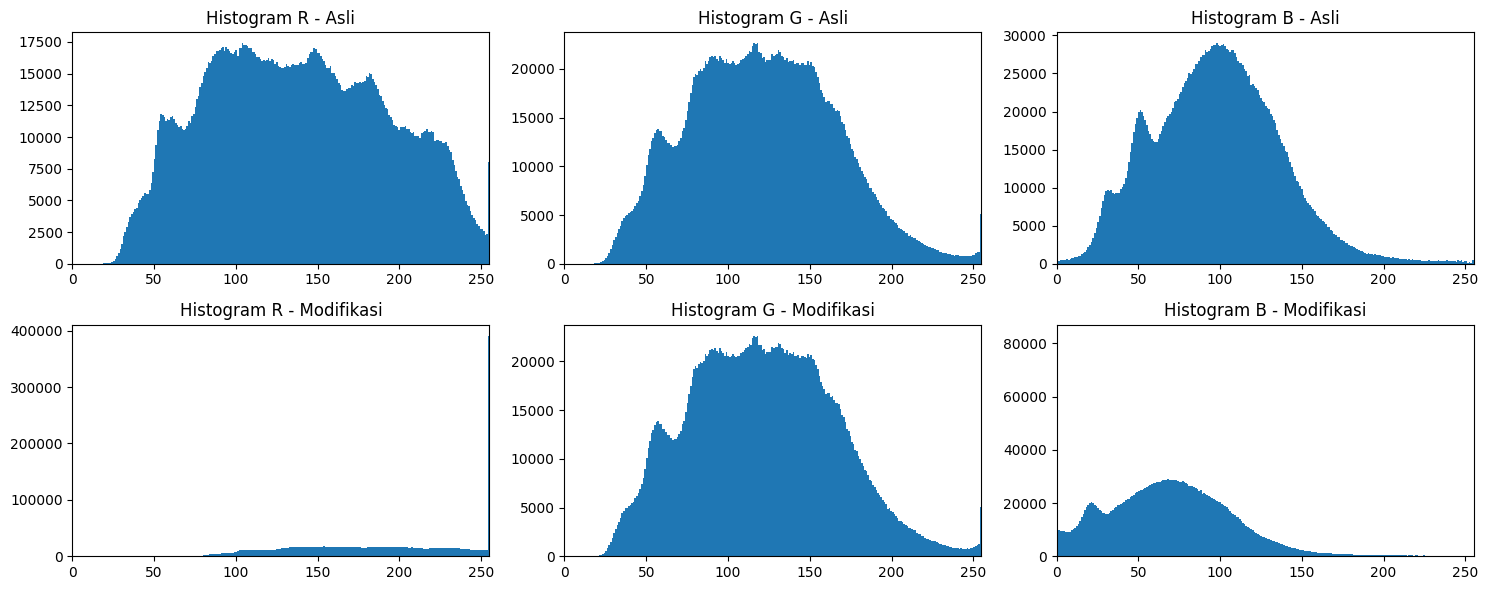

In [61]:
# Data untuk histogram
R_flat  = R.astype(np.uint8).ravel()
G_flat  = G.astype(np.uint8).ravel()
B_flat  = B.astype(np.uint8).ravel()

R_mod_flat = R_mod.ravel()
G_mod_flat = G_mod.ravel()
B_mod_flat = B_mod.ravel()

fig, ax = plt.subplots(2, 3, figsize=(15, 6))

# Histogram gambar asli
ax[0, 0].hist(R_flat, bins=256, range=(0, 255))
ax[0, 0].set_title('Histogram R - Asli')

ax[0, 1].hist(G_flat, bins=256, range=(0, 255))
ax[0, 1].set_title('Histogram G - Asli')

ax[0, 2].hist(B_flat, bins=256, range=(0, 255))
ax[0, 2].set_title('Histogram B - Asli')

# Histogram gambar hasil modifikasi
ax[1, 0].hist(R_mod_flat, bins=256, range=(0, 255))
ax[1, 0].set_title('Histogram R - Modifikasi')

ax[1, 1].hist(G_mod_flat, bins=256, range=(0, 255))
ax[1, 1].set_title('Histogram G - Modifikasi')

ax[1, 2].hist(B_mod_flat, bins=256, range=(0, 255))
ax[1, 2].set_title('Histogram B - Modifikasi')

for a in ax.ravel():
    a.set_xlim(0, 255)

plt.tight_layout()
plt.show()


G. Jelaskan dampak perubahan RGB pada warna gambar dalam sel Markdown.

Dampak dari perubahan warna setelah dilakukan modifikasi pada intensitas warna di channel merah+50 dan biru-30 adalah pada area wajah, dedaunan dan pakaian tampak kemerahan dan hangat, karena kurang kuntribusi dari warna biru sehingga tone keseluruhan gambar menjadi mengarah ke warna kuning-orange. Perbedaan ini sangat kontras dibandingkan gambar asli yang memiliki warna lebih natural dan hijau. Secara histogram, perubahan ini bisa dilihat pada pergeseran channel merah ke intensitas yang lebih tinggi dan channel biru ke intensitas yang lebih rendah, sedangkan channel hijau tidak mengalami perubahan.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


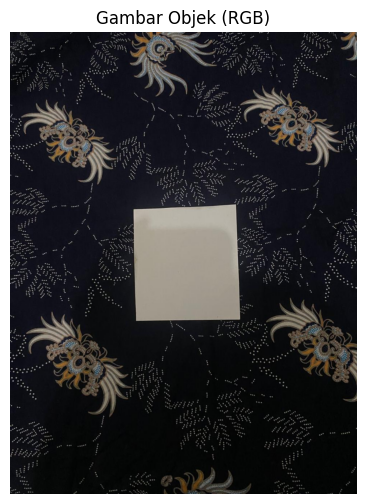

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar objek
img_path = 'assets_ws4/foto_objek.jpeg'   # sesuaikan path
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Gambar Objek (RGB)")
plt.axis('off')
plt.show()


B. Terapkan edge detection (Canny) dan tampilkan hasilnya.

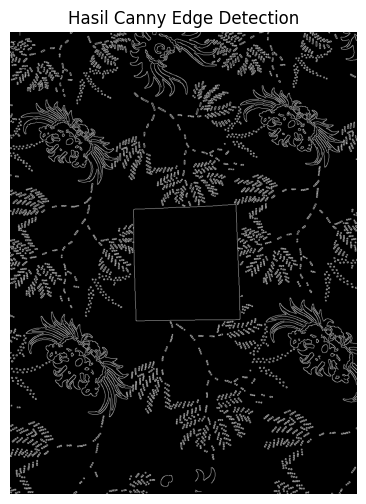

True

In [39]:
# Konversi ke grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Menggunakan efek blur untuk mengurangi noise/tekstur kain
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blur, threshold1=100, threshold2=200)

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title("Hasil Canny Edge Detection")
plt.axis('off')
plt.show()

# Simpan hasil Edge Detection
cv2.imwrite("results_ws4/soal3_edge_canny.png", edges)

C. Lakukan thresholding dengan nilai ambang tertentu (bebas Anda tentukan) agar hanya objek utama yang tersisa.

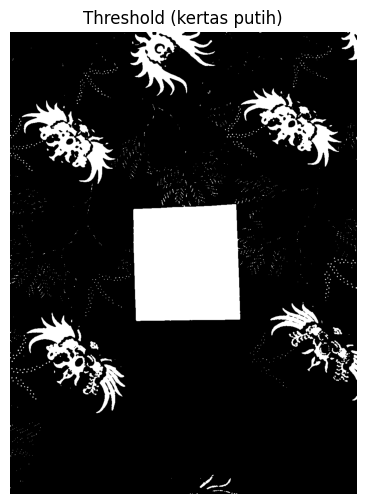

True

In [40]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Menggunakan efek blur untuk mengurangi noise/tekstur kain
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Thresholding (kertas = putih, background = hitam)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title("Threshold (kertas putih)")
plt.axis('off')
plt.show()

# Simpan hasil Thresholding
cv2.imwrite("results_ws4/soal3_threshold.png", thresh)

D. Buat bounding box di sekitar objek hasil segmentasi (boleh manual atau otomatis).

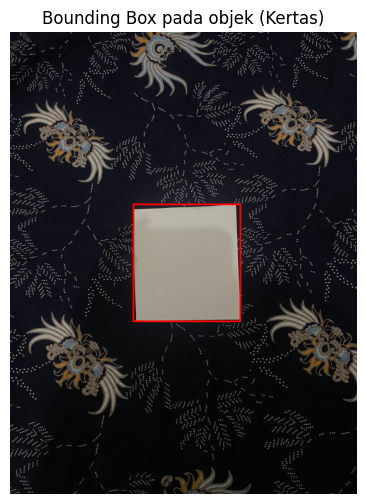

True

In [43]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mengambil kontur terbesar untuk penentuan objek
cnt = max(contours, key=cv2.contourArea)

# Bounding box
x, y, w, h = cv2.boundingRect(cnt)

bbox_img = img_rgb.copy()
cv2.rectangle(bbox_img, (x, y), (x + w, y + h), (255, 0, 0), 4)

plt.figure(figsize=(6, 6))
plt.imshow(bbox_img)
plt.title("Bounding Box pada objek (Kertas)")
plt.axis('off')
plt.show()

# Simpan hasil Bounding Box
cv2.imwrite("results_ws4/soal3_bounding_box.png", cv2.cvtColor(bbox_img, cv2.COLOR_RGB2BGR))

E. Terapkan filter blur dan filter sharpening, lalu bandingkan hasil keduanya.

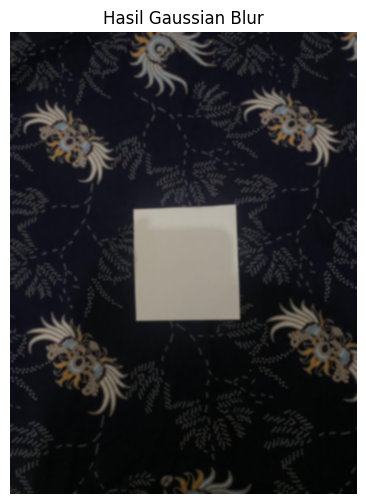

True

In [44]:
# Fiter blur
blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)

plt.figure(figsize=(6, 6))
plt.imshow(blurred)
plt.title("Hasil Gaussian Blur")
plt.axis('off')
plt.show()

# Simpan hasil Gaussian Blur
cv2.imwrite("results_ws4/soal3_blur.png", cv2.cvtColor(blurred, cv2.COLOR_RGB2BGR))

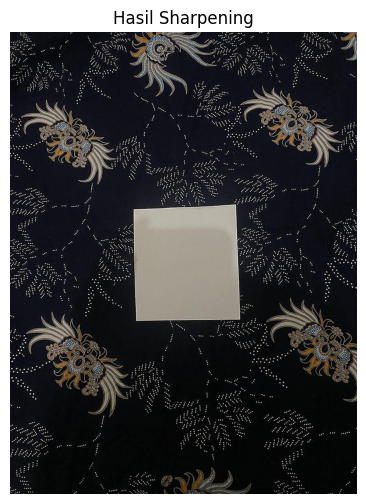

True

In [45]:
# Filter sharpening
kernel_sharp = np.array([[0, -1,  0],
                         [-1, 5, -1],
                         [0, -1,  0]])

sharpened = cv2.filter2D(img_rgb, -1, kernel_sharp)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened)
plt.title("Hasil Sharpening")
plt.axis('off')
plt.show()

# Simpan hasil Sharpening
cv2.imwrite("results_ws4/soal3_sharpen.png", cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))

F. Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format Markdown.

Filter blur bekerja dengan meratakan nilai piksel di area sekitar sehingga detail halus pada citra menjadi berkurang. Pada gambar ini, tekstur kain yang awalnya tajam menjadi lebih lembut dan tepi kertas terlihat kurang jelas. Sebaliknya, filter sharpening meningkatkan perbedaan intensitas antar piksel di sekitar tepi objek, sehingga garis batas kertas dan motif kain tampak lebih tegas dibandingkan citra asli. Karena permukaan kertas sangat polos, efek sharpening lebih terlihat pada area tepi dan bagian background bermotif, sementara bagian dalam kertas tetap tampak rata.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

A. Ambil gambar diri Anda dengan ekspresi wajah **netral**.


Face shape: (3088, 2316, 3)
Glasses shape (RGBA): (512, 900, 3)


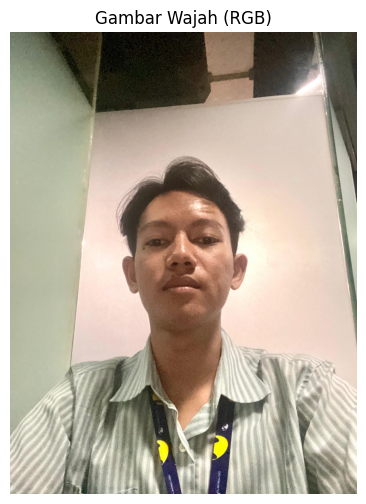

In [35]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Load gambar wajah (selfie netral)
img_face_bgr = cv2.imread('assets_ws4/foto_wajah_netral.jpeg')
img_face_rgb = cv2.cvtColor(img_face_bgr, cv2.COLOR_BGR2RGB)

# Load filter kacamata (PNG, dengan alpha)
glasses_rgba = cv2.imread('assets_ws4/filter_kacamata.png', cv2.IMREAD_UNCHANGED)  # RGBA

print("Face shape:", img_face_rgb.shape)
print("Glasses shape (RGBA):", glasses_rgba.shape)

plt.figure(figsize=(6,6))
plt.imshow(img_face_rgb)
plt.title("Gambar Wajah (RGB)")
plt.axis("off")
plt.show()


B. Lakukan deteksi wajah dan landmark menggunakan salah satu dari:

* MediaPipe
* Dlib
* OpenCV.

In [3]:
!pip install mediapipe

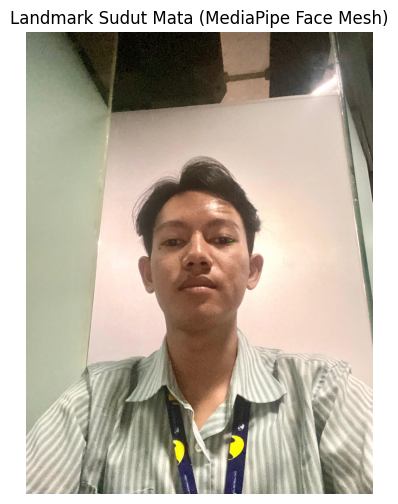

True

In [139]:
# Deteksi landmark wajah dengan mediapipie
mp_face_mesh = mp.solutions.face_mesh

face_landmarks = None

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:
    results = face_mesh.process(img_face_rgb)
    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

# Visualisasi beberapa landmark penting
img_vis = img_face_rgb.copy()
h, w, _ = img_vis.shape

# indeks landmark sudut luar mata kiri & kanan
LEFT_EYE_OUTER = 33
RIGHT_EYE_OUTER = 263

lx = int(face_landmarks.landmark[LEFT_EYE_OUTER].x * w)
ly = int(face_landmarks.landmark[LEFT_EYE_OUTER].y * h)
rx = int(face_landmarks.landmark[RIGHT_EYE_OUTER].x * w)
ry = int(face_landmarks.landmark[RIGHT_EYE_OUTER].y * h)

# gambar titik pada mata
cv2.circle(img_vis, (lx, ly), 5, (255, 0, 0), -1)
cv2.circle(img_vis, (rx, ry), 5, (0, 255, 0), -1)

plt.figure(figsize=(6,6))
plt.imshow(img_vis)
plt.title("Landmark Sudut Mata (MediaPipe Face Mesh)")
plt.axis("off")
plt.show()

# Simpan hasil deteksi landmark
cv2.imwrite("results_ws4/soal4_landmark_face_mesh.png", cv2.cvtColor(img_vis, cv2.COLOR_RGB2BGR))


C. Buat overlay filter digital kreatif karya Anda sendiri, misalnya:

* topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
* Filter boleh dibuat dari gambar eksternal (PNG) atau digambar langsung (misal bentuk lingkaran, garis, poligon, dll).

D. Pastikan posisi overlay menyesuaikan landmark wajah dengan logis.

E. Gunakan alpha blending sebagai saran agar hasil tampak lebih natural.

Glasses RGBA shape: (512, 900, 4)
Alpha unique: [  0 255]


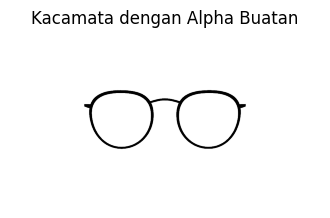

In [31]:
import cv2
import numpy as np

# Memproses gambar kacamata yang akan digunakan jadi filter
# Load gambar kacamata
glasses_bgr = cv2.imread('assets_ws4/filter_kacamata.png')
glasses_rgb = cv2.cvtColor(glasses_bgr, cv2.COLOR_BGR2RGB)

# Grayscale untuk memisahkan garis kacamata (hitam) dan background (terang)
glasses_gray = cv2.cvtColor(glasses_bgr, cv2.COLOR_BGR2GRAY)

# Threshold
_, alpha = cv2.threshold(glasses_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Gabungkan kembali ke gambar asli
b, g, r = cv2.split(glasses_bgr)
glasses_rgba = cv2.merge([r, g, b, alpha])

print("Glasses RGBA shape:", glasses_rgba.shape)
print("Alpha unique:", np.unique(alpha))

plt.figure(figsize=(4,4))
plt.imshow(glasses_rgba)
plt.title("Kacamata dengan Alpha Buatan")
plt.axis("off")
plt.show()


In [27]:
# Hitung jarak antar mata
eye_distance = np.sqrt((rx - lx)**2 + (ry - ly)**2)

# Tentukan lebar target kacamata relatif jarak mata
glasses_target_width = int(eye_distance * 2.3)

# Skala kacamata sesuai lebar target
gh, gw = glasses_rgba.shape[:2]
scale = glasses_target_width / gw
glasses_target_height = int(gh * scale)

# Resize kacamata
glasses_resized = cv2.resize(
    glasses_rgba,
    (glasses_target_width, glasses_target_height),
    interpolation=cv2.INTER_AREA
)

# Titik tengah antara kedua mata ke pusat kacamata
center_x = (lx + rx) // 2
center_y = (ly + ry) // 2

# Hitung koordinat untuk menaruh kacamata
top_left_x = int(center_x - glasses_target_width / 2)
top_left_y = int(center_y - glasses_target_height / 2)

print("Top-left glasses:", top_left_x, top_left_y)
print("Size glasses:", glasses_resized.shape)


Top-left glasses: 634 1112
Size glasses: (581, 1022, 4)


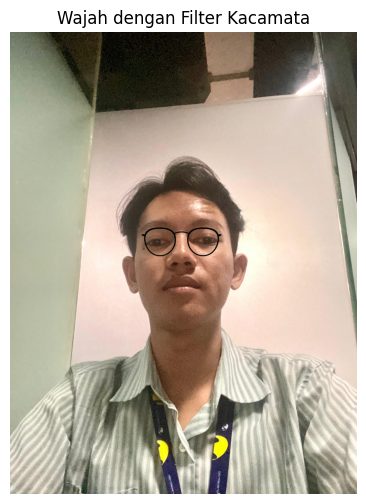

In [32]:
# Salin gambar wajah untuk menggunakan filter
face_with_glasses = img_face_rgb.copy()

# Cek jumlah channel pada glasses_resized
if glasses_resized.shape[2] == 4:
    # Pisahkan channel RGBA kacamata
    g_bgr = glasses_resized[..., :3]
    g_alpha = glasses_resized[..., 3]
    # Normalisasi alpha ke [0,1] dan bentuk jadi (h, w, 1)
    alpha = (g_alpha / 255.0).reshape(glasses_target_height, glasses_target_width, 1)
else:
    # Jika tidak ada alpha channel (hanya RGB), gunakan gambar RGB dan buat alpha channel penuh (opaque)
    g_bgr = glasses_resized
    alpha = np.ones((glasses_target_height, glasses_target_width, 1), dtype=np.float32) * 255
    alpha = (alpha / 255.0).reshape(glasses_target_height, glasses_target_width, 1)

# Pastikan ROI masih di dalam gambar (clipping sederhana)
h_face, w_face, _ = face_with_glasses.shape
x1 = max(top_left_x, 0)
y1 = max(top_left_y, 0)
x2 = min(top_left_x + glasses_target_width, w_face)
y2 = min(top_left_y + glasses_target_height, h_face)

# Sesuaikan ukuran overlay jika terpotong
overlay_w = x2 - x1
overlay_h = y2 - y1

if overlay_w > 0 and overlay_h > 0:
    roi = face_with_glasses[y1:y2, x1:x2]
    g_bgr_cropped = g_bgr[0:overlay_h, 0:overlay_w]
    alpha_cropped = alpha[0:overlay_h, 0:overlay_w]

    # Alpha blending
    blended = (alpha_cropped * g_bgr_cropped + (1 - alpha_cropped) * roi).astype(np.uint8)
    face_with_glasses[y1:y2, x1:x2] = blended

plt.figure(figsize=(6,6))
plt.imshow(face_with_glasses)
plt.title("Wajah dengan Filter Kacamata")
plt.axis("off")
plt.show()

F. Tampilkan perbandingan antara gambar asli dan hasil dengan filter.

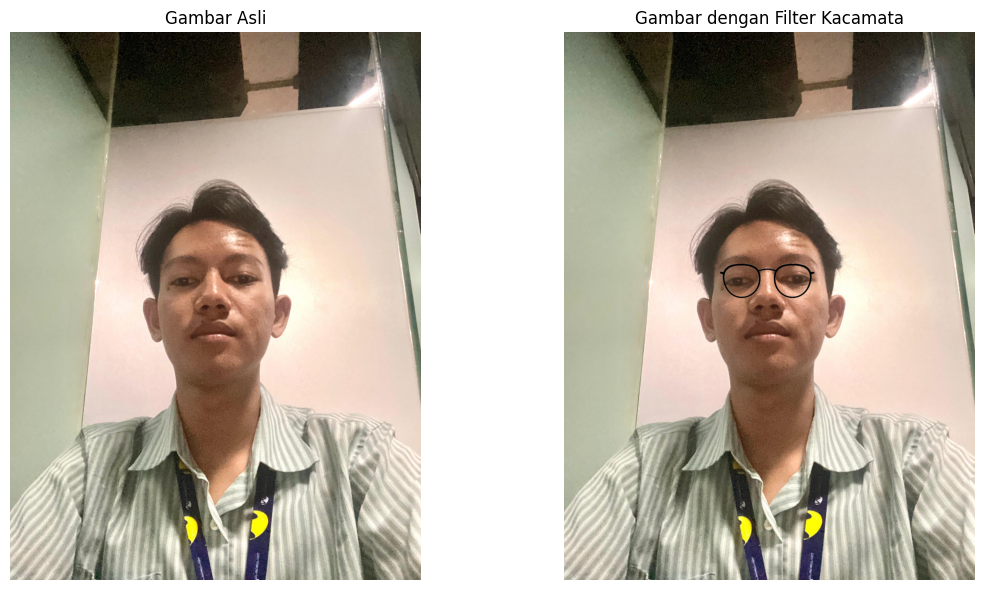

True

In [34]:
# Visusalisasi perbandingan foto asli dengan foto yang telah menggunakan filter
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_face_rgb)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(face_with_glasses)
ax[1].set_title("Gambar dengan Filter Kacamata")
ax[1].axis("off")

plt.tight_layout()
plt.show()

# Simpan hasil
cv2.imwrite('results_ws4/soal4_face_with_glasses.png', cv2.cvtColor(face_with_glasses, cv2.COLOR_RGB2BGR))


G. Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan Markdown).

Posisi overlay kacamata dihitung berdasarkan landmark wajah dari MediaPipe Face Mesh, khususnya titik sudut luar mata kiri (landmark 33) dan kanan (landmark 263). Jarak antar kedua titik tersebut digunakan sebagai acuan untuk menentukan skala kacamata, sehingga lebar filter disesuaikan secara proporsional terhadap ukuran wajah. Titik tengah antara kedua landmark mata menjadi pusat penempatan kacamata, dan dari titik ini dihitung posisi top-left untuk menempatkan overlay di area yang tepat. Proses penyesuaian melibatkan perhitungan offset agar kacamata tidak terlalu tinggi atau rendah serta memastikan ROI tetap berada dalam batas gambar. Tantangan utama selama implementasi adalah mengatasi variasi bentuk wajah, pencahayaan, serta ketidaksesuaian filter PNG yang tidak memiliki alpha channel, sehingga diperlukan pembuatan mask transparansi secara manual agar kacamata terlihat natural ketika ditumpangkan pada wajah.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

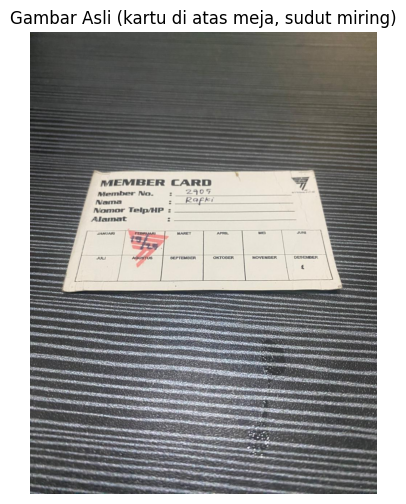

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar kartu
img_bgr = cv2.imread('assets_ws4/foto_kartu.jpeg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Gambar Asli (kartu di atas meja, sudut miring)")
plt.axis('off')
plt.show()


B. Lakukan preprocessing untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

* Konversi ke grayscale.
* Koreksi perspektif (transformasi homografi) menggunakan 4 titik manual agar objek terlihat sejajar dan tidak terdistorsi.
* Terapkan thresholding adaptif atau Otsu (pilih salah satu, dan jelaskan alasan pilihan Anda).

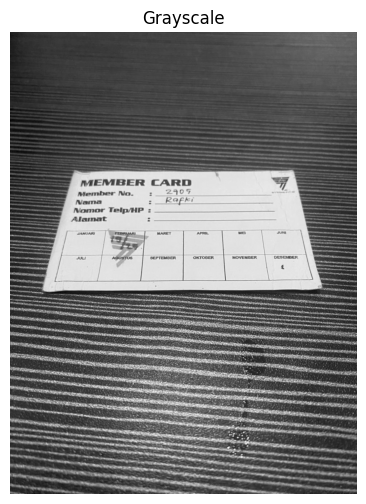

True

In [136]:
# Konversi ke grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

# Simpan hasil grayscale
cv2.imwrite('results_ws4/soal5_gray.png', gray)

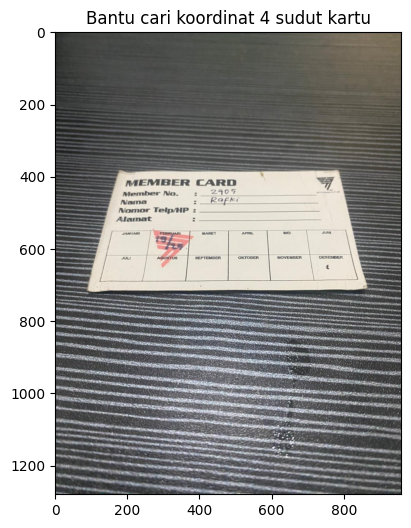

In [48]:
# Melihat koordinat sudut kartu
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Bantu cari koordinat 4 sudut kartu")
plt.axis('on')
plt.show()


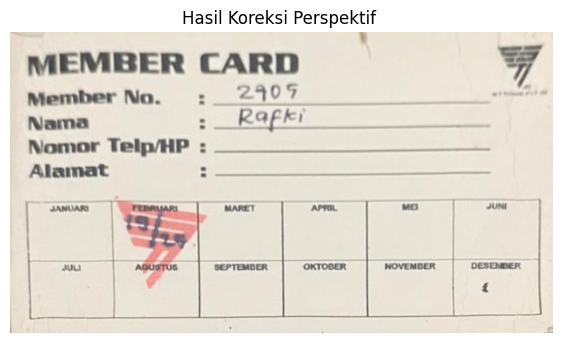

True

In [137]:
# Koordinat 4 sudut kartu pada gambar asli (source points)
src_pts = np.float32([
    [185, 390],   # kiri atas  (x1, y1)
    [780, 390],  # kanan atas (x2, y2)
    [860, 710],  # kanan bawah (x3, y3)
    [90, 710]    # kiri bawah (x4, y4)
])

# Tentukan ukuran output kartu setelah dirapikan
width, height = 900, 500
dst_pts = np.float32([
    [0, 0],             # kiri atas
    [width-1, 0],       # kanan atas
    [width-1, height-1],# kanan bawah
    [0, height-1]       # kiri bawah
])

# Matriks homografi
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Warp perspective
warped = cv2.warpPerspective(img_rgb, M, (width, height))

plt.figure(figsize=(7, 4))
plt.imshow(warped)
plt.title("Hasil Koreksi Perspektif ")
plt.axis('off')
plt.show()

# Simpan hasil koreksi perspektif
cv2.imwrite('results_ws4/soal5_warped.png', cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))

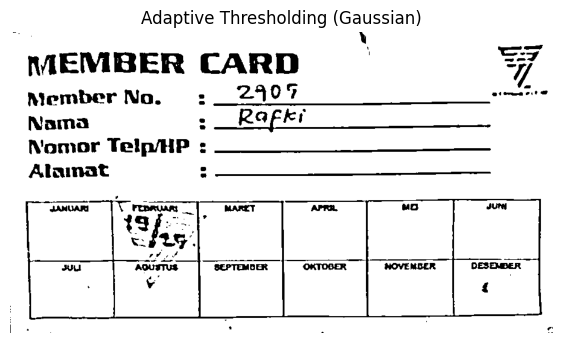

True

In [138]:
warped_gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

# Adaptif tresholding
adaptive = cv2.adaptiveThreshold(
    warped_gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    29,
    15
)

plt.figure(figsize=(7, 4))
plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive Thresholding (Gaussian)")
plt.axis('off')
plt.show()

# Simpan hasil adaptif tresholding
cv2.imwrite('results_ws4/soal5_adaptive_tresholding.png', adaptive)


C. Tampilkan setiap tahap pemrosesan dalam satu grid agar mudah dibandingkan.

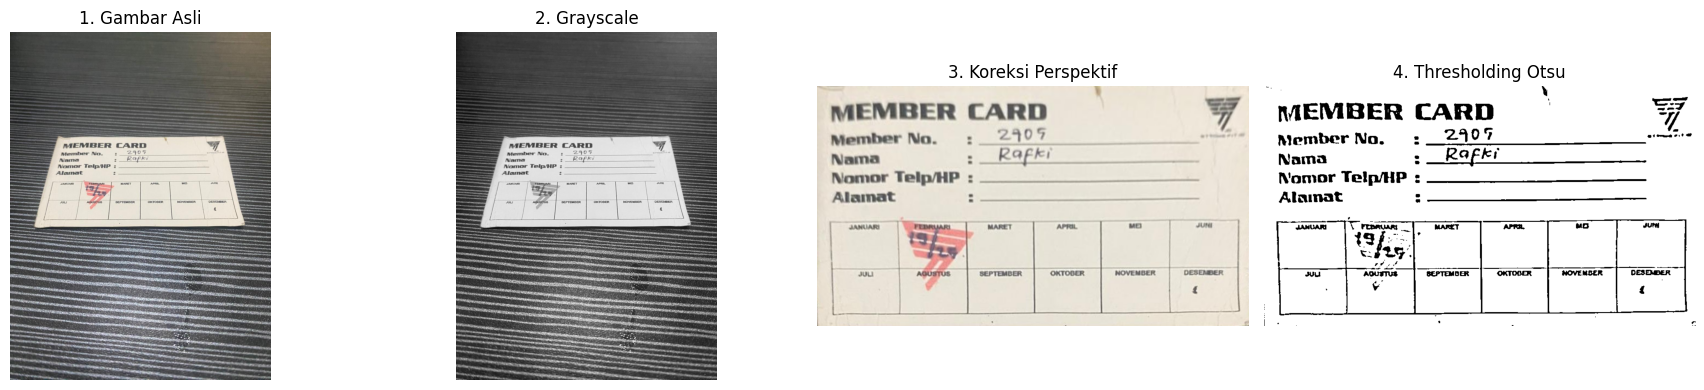

In [135]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

# Visualisasi gambar asli
ax[0].imshow(img_rgb)
ax[0].set_title("1. Gambar Asli")
ax[0].axis('off')

# Visualisasi konversi grayscale
ax[1].imshow(gray, cmap='gray')
ax[1].set_title("2. Grayscale")
ax[1].axis('off')

# Visualisasi hasil koreksi perspektif
ax[2].imshow(warped)
ax[2].set_title("3. Koreksi Perspektif")
ax[2].axis('off')

# Visualisasi hasil tresholding
ax[3].imshow(adaptive, cmap='gray')
ax[3].set_title("4. Thresholding Otsu")
ax[3].axis('off')

plt.tight_layout()
plt.show()


D. Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan Markdown).

Pada proses peningkatan citra ini terdapat 3 tahap yaitu yang pertama konversi ke grayscale untuk menyederhanakan informasi warna menjadi intensitas terang–gelap sehingga mempermudah ekstraksi fitur. Tahap kedua yaitu melakukan koreksi perspektif dengan menentukan titik pada sudut tiap kartu ditentukan dengan memperhatikan koordinat piksel pada plot gambar, yaitu sudut kiri atas, kanan atas, kanan bawah, dan kiri bawah, sehingga bentuk kartu yang awalnya miring akibat pengambilan gambar pada sudut yang tidak sejajar dapat diluruskan menjadi persegi empat yang proporsional. Pada tahap ketiga yaitu melakukan adaptif tresholding untuk meningkatkan kontras antara teks dan background. adaptive tresholding digunakan karena dapat menghitung nilai ambang secara lokal pada blok kecil sehingga mampu mempertahankan teks, garis tabel, dan tulisan pena dengan jauh lebih jelas.

# Referensi dan Link Tautan

Referensi Teknis : https://chatgpt.com/share/6919773b-2df4-800a-8acf-5ab242d02a20

Sumber gambar kacamata : https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.pngegg.com%2Fid%2Fpng-ynccn&psig=AOvVaw2aJn5BbZ-yeoq05t2Z96kv&ust=1763363037494000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCJDBxtuN9pADFQAAAAAdAAAAABAL

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.